<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/13_3_CallBack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

callback을 통해서 학습을 적정 시점에 멈추거나, 
베스트 모델을 저장할 수 있습니다. 

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

In [1]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
def mnist_train(callbacks, epochs):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])  
    
    # 모델 컴파일하기
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # 모델 학습
    history = model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test), 
                        callbacks = callbacks)
    
    return model, history

In [3]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure()
    plt.title('loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.figure()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['train', 'test'], loc='upper left')

In [4]:
model1, history1= mnist_train(callbacks = None, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1865/1875 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.9134WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D0E096F1F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

In [5]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0766 - accuracy: 0.9766


[0.07656994462013245, 0.9765999913215637]

In [6]:
print(history1.history)

{'loss': [0.30043768882751465, 0.1458761841058731, 0.10838117450475693, 0.08834265917539597, 0.07411342114210129], 'accuracy': [0.9135333299636841, 0.9567333459854126, 0.9668833613395691, 0.9730166792869568, 0.9768166542053223], 'val_loss': [0.13990527391433716, 0.10225702822208405, 0.0893225446343422, 0.0796893835067749, 0.07656994462013245], 'val_accuracy': [0.9591000080108643, 0.9702000021934509, 0.9740999937057495, 0.9760000109672546, 0.9765999913215637]}


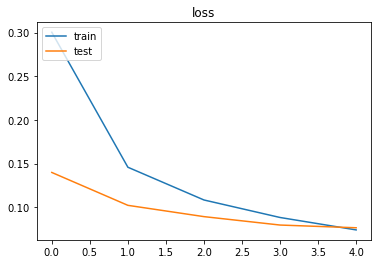

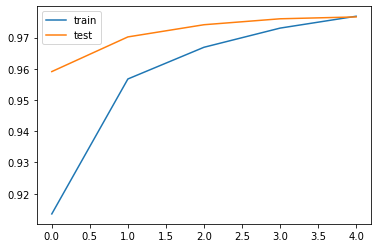

In [7]:
plot_history(history1)

EarlyStopping을 통해서 불필요하게 학습 되는 것을 방지할 수 있습니다

In [8]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model2, history2 = mnist_train(earlystop, 20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1859/1875 [============================>.] - ETA: 0s - loss: 0.2963 - accuracy: 0.9134WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D3518BBD38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

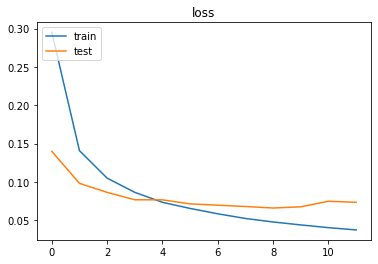

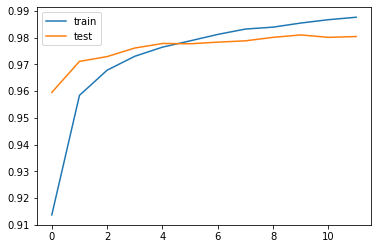

In [9]:
plot_history(history2)

In [10]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 0.9804


[0.0733642429113388, 0.980400025844574]

ModelCheckpoint callback을 통해서
학습 중간의 학습값을 (weights)를 저장할 수 있습니다

In [11]:
checkpoint_path = '/tmp/checkpoint/models3'

In [12]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

In [13]:
model3, history3 = mnist_train(checkpoint, 10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 0s - loss: 0.2925 - accuracy: 0.9147WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D3539BA798> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

INFO:tensorflow:Assets written to: /tmp/checkpoint\models3\assets
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0738 - accuracy: 0.9768 - val_loss: 0.0755 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0661 - accuracy: 0.9790 - val_loss: 0.0755 - val_accuracy: 0.9787
Epoch 7/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.0577 - accuracy: 0.9814WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x000001D35322D678> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on L

In [14]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9801


[0.07448724657297134, 0.9800999760627747]

In [15]:
!ls '/tmp/checkpoint'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [16]:
model3_best = tf.keras.models.load_model('/tmp/checkpoint/models3')

In [17]:
model3_best.evaluate(x_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.0982


[0.06821312010288239, 0.0982000008225441]

In [18]:
checkpoint_path = '/tmp/checkpoint/models4'
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

model4, history4 = mnist_train([earlystop, checkpoint], 10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1868/1875 [============================>.] - ETA: 0s - loss: 0.2983 - accuracy: 0.9135WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D33F71D048> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

Epoch 6/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.0662 - accuracy: 0.9794WARNING:tensorflow:AutoGraph could not transform <function canonicalize_signatures.<locals>.signature_wrapper at 0x000001D3407F0558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: /tmp/checkpoint\models4\assets
1875/1875 [==============================] - 3s 2ms/step - 

In [19]:
model4_best = tf.keras.models.load_model('/tmp/checkpoint/models4')

In [20]:
model4_best.evaluate(x_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.0974


[0.06823483854532242, 0.09740000218153]

In [21]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)
model5, history5 = mnist_train(earlystop, 20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1830/1875 [============================>.] - ETA: 0s - loss: 0.3019 - accuracy: 0.9121WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D33F636DC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

In [22]:
model5.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0684 - accuracy: 0.9803


[0.0683906152844429, 0.9803000092506409]

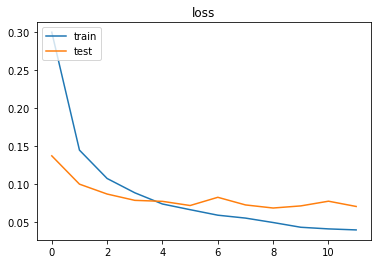

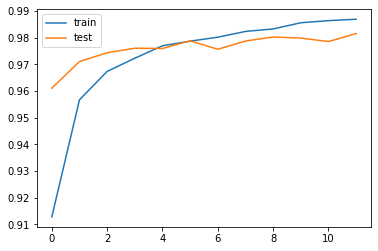

In [23]:
plot_history(history5)